# Airline Passenger Satisfaction - 

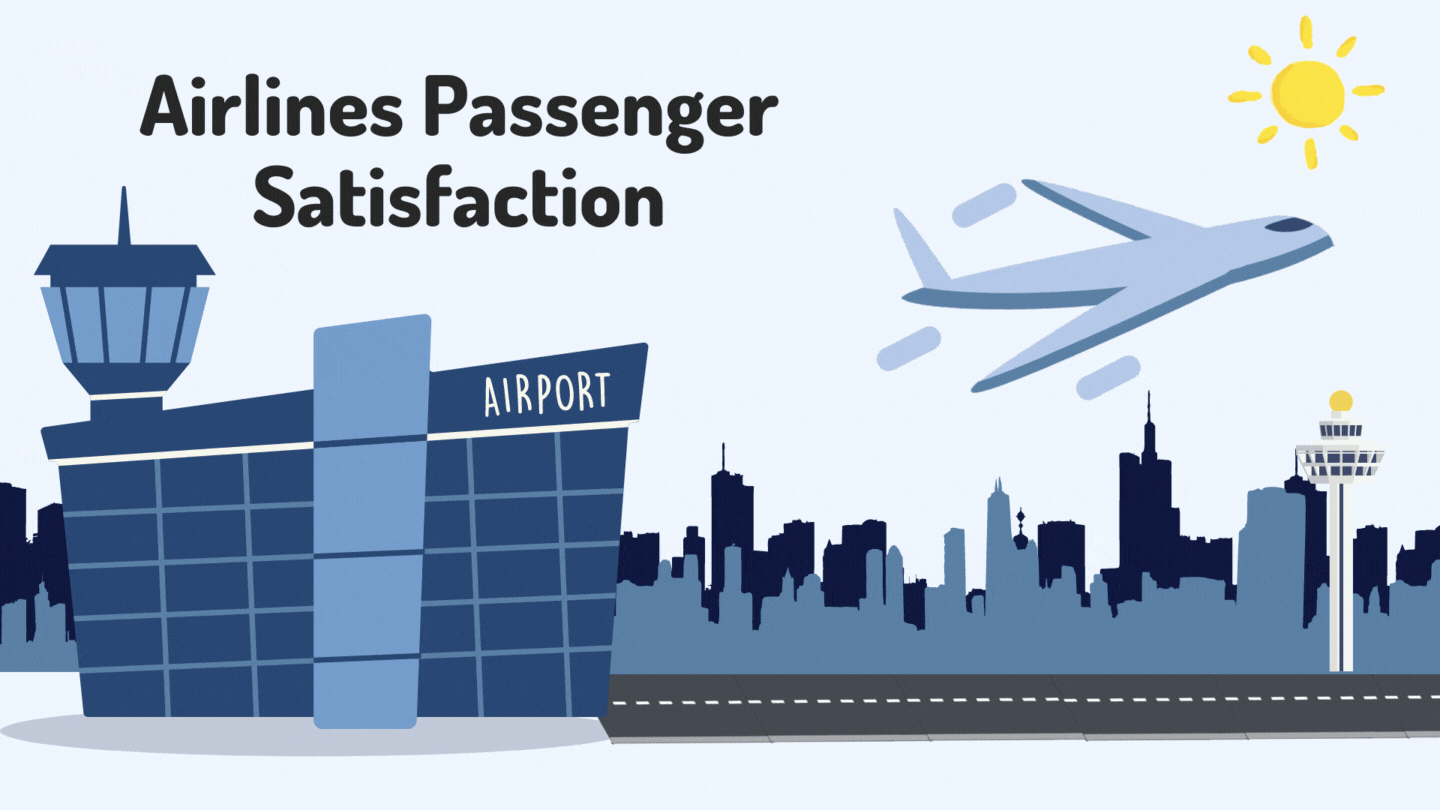

### Table of Contents

* [About the dataset](#data)
* [Libraries](#lib)
* [Data Preparation](#DP)
* [EDA](#ED)
    * [Outlier Analysis and Treatment](#OT)
    * [Missing Values Analysis and Treatment](#MVT)
    * [Univariate Analysis](#UA)
        * [Categorical Univariate](#CU)
    * [Bivariate Analysis](#BV)
    * [Multivariate Analysis](#MA)
* [Data Preparation for Modeling](#DPM)
* [Train Test Split](#TTS)
    * [Extra Tree Classifier](#ETC)
    * [Gradient Boosting Classifier](#GBC)
    * [Decision Tree Classifier](#DTC)
    * [Random Forest Classifier](#RFC)

<a id='data'></a>
# About the Dataset

1. Gender - Gender of the passengers (Female, Male).
2. Customer - Type The customer type (Loyal customer, disloyal customer).
3. Age - The actual age of the passengers Numerical.
4. Type of Travel - Purpose of the flight of the passengers (Personal Travel, Business Travel.
5. Class - Travel class in the plane of the passengers (Business, Eco, Eco Plus).
6. Flight distance - The flight distance of this journey.
7. Inflight Wi-Fi service - Satisfaction level of the inflight Wi-Fi service.
8. Departure/Arrival time convenient - Satisfaction level of Departure/Arrival time	Category.
9. Ease of Online booking - Satisfaction level of online booking.
10. Gate location - Satisfaction level of Gate location.
11. Food and drink - Satisfaction level of Food and drink.
12. Online boarding - Satisfaction level of online boarding.
13. Seat comfort - Satisfaction level of Seat comfort.
14. Inflight entertainment - Satisfaction level of inflight entertainment.
15. On-board service - Satisfaction level of On-board service.
16. Leg room service - Satisfaction level of Leg room service.
17. Baggage handling - Satisfaction level of baggage handling.
18. Check-in service - Satisfaction level of Check-in service.
19. Inflight service - Satisfaction level of inflight service.
20. Cleanliness - Satisfaction level of Cleanliness.
21. Departure Delay in Minutes - Minutes delayed when departure.
22. Arrival Delay in Minutes - Minutes delayed when Arrival.

<a id="lib"> </a>
# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer,KBinsDiscretizer,RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,accuracy_score
from matplotlib.colors import ListedColormap

<a id='DP'></a>
# About the Dataset

In [2]:
#Lets load the data
df=pd.read_csv('final.csv')

In [3]:
# Lets see the Data dimensions
df.shape

(129880, 26)

In [4]:
#Glimse of the data with columns observations
df.head()

,Unnamed: 0,Unnamed: 0.1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172.0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5.0,4,3,4.0,4,5,5.0,25.0,18.0,neutral or dissatisfied
1,1,1,5047.0,Male,disloyal Customer,25,Business travel,Business,235,3,...,1.0,1,5,3.0,1,4,1.0,1.0,6.0,neutral or dissatisfied
2,2,2,110028.0,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5.0,4,3,4.0,4,4,5.0,0.0,0.0,satisfied
3,3,3,24026.0,Female,Loyal Customer,25,Business travel,Business,562,2,...,2.0,2,5,3.0,1,4,2.0,11.0,9.0,neutral or dissatisfied
4,4,4,119299.0,Male,Loyal Customer,61,Business travel,Business,214,3,...,3.0,3,4,4.0,3,3,3.0,0.0,0.0,satisfied


In [5]:
# Lets see the Data types
df.dtypes

Unnamed: 0                             int64
Unnamed: 0.1                           int64
id                                   float64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                        float64
Food and drink                         int64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                       int64
Leg room service                       int64
Baggage handling                     float64
Checkin service                        int64
Inflight service                       int64
Cleanlines

In [6]:
#Lets see the column names 
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
# Check for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Unnamed: 0.1                       129880 non-null  int64  
 2   id                                 110976 non-null  float64
 3   Gender                             129880 non-null  object 
 4   Customer Type                      129880 non-null  object 
 5   Age                                129880 non-null  int64  
 6   Type of Travel                     129880 non-null  object 
 7   Class                              129880 non-null  object 
 8   Flight Distance                    129880 non-null  int64  
 9   Inflight wifi service              129880 non-null  int64  
 10  Departure/Arrival time convenient  129880 non-null  int64  
 11  Ease of Online booking             1298

In [8]:
# Lets check for Null Values
df.isnull().sum()

Unnamed: 0                               0
Unnamed: 0.1                             0
id                                   18904
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                    0
Departure/Arrival time convenient        0
Ease of Online booking                   0
Gate location                          713
Food and drink                           0
Online boarding                       3436
Seat comfort                           675
Inflight entertainment                 845
On-board service                         0
Leg room service                         0
Baggage handling                      1168
Checkin service                          0
Inflight service                         0
Cleanliness                           1053
Departure D

In [9]:
# Lets check for percentage of null values in each column where null are present 
(df.isnull().sum()/df.shape[0])*100

Unnamed: 0                            0.000000
Unnamed: 0.1                          0.000000
id                                   14.554974
Gender                                0.000000
Customer Type                         0.000000
Age                                   0.000000
Type of Travel                        0.000000
Class                                 0.000000
Flight Distance                       0.000000
Inflight wifi service                 0.000000
Departure/Arrival time convenient     0.000000
Ease of Online booking                0.000000
Gate location                         0.548968
Food and drink                        0.000000
Online boarding                       2.645519
Seat comfort                          0.519711
Inflight entertainment                0.650601
On-board service                      0.000000
Leg room service                      0.000000
Baggage handling                      0.899292
Checkin service                       0.000000
Inflight serv

### Key Observations
1 id - In id column there are around 14.5% null values.

2 Gate Location - In Gate Location there are around .5% null values.

3 Online Boarding - In Online Boarding column there are around 2.64% null values.

4 Seat Comfort - In Seat Comfort column there are around .5% null values.

5 Inflight entertainment - In Inflight entertainment column there are around .65% null values.

6 Baggage handling - In Baggage handling column there are around .89% null values.

7 Cleanliness - In Cleanliness column there are around .81% null values.

8 Departure Delay in Minutes - In Departure Delay in Minutes column there are around 1.99% null values.

9 Arrival Delay in Minutes - In Arrival Delay in Minutes column there are around .3% null values.

In [10]:
# Lets check for 5 point for Summary
df.describe()

,Unnamed: 0,Unnamed: 0.1,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,110976.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129167.000000,129880.000000,...,129205.000000,129035.000000,129880.000000,129880.000000,128712.000000,129880.000000,129880.000000,128827.000000,127285.000000,129487.000000
mean,44158.700000,44158.700000,64873.866782,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976821,3.204774,...,3.439310,3.354780,3.383023,3.350878,3.629428,3.306267,3.642193,3.281765,14.731689,15.091129
std,31207.377062,31207.377062,37487.786019,15.119360,997.452477,1.329340,1.526741,1.401740,1.281321,1.329933,...,1.321372,1.336723,1.287099,1.316252,1.183985,1.266185,1.176669,1.316752,38.150894,38.465650
min,0.000000,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,16234.750000,32367.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,38963.500000,64870.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,71433.250000,97286.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Key Observations
1 Age - As we can see the average of people travelling in the flight is around 40 years

2 Flight Distance - In flight distance we can see that min distance is 31 only whereas max is around 4983 and also the   50% quantile is around 844 only so there may be outlier presence in the data . The average distance a flight travels   is around 1190.

3 Departure Delay in Minutes - The average departure delay in minutes is around 14.7 minutes and the maximum delay 
  is around 1592 which is very high from mean that must be a high for outliers .

4 Arrival Delay in Minutes - The average arrival delay in minutes is around 15 minutes , whereas maximum is very high   at 1584 which strong hint for presence for outliers . 


In [11]:
# Lets see the 5 point summary for categorical data 
df.select_dtypes(np.object).describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


# Lets check for presence of outliers in the Data 
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [12]:
#As we can see from boxplot there are outliers present in several columns
#1.Flight Distance
#2.Checkin Services
#3.Departure delay in Minutes
#4.Arrival Delay in Minutes

In [13]:
df1=df

In [14]:
df1.head()


,Unnamed: 0,Unnamed: 0.1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172.0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5.0,4,3,4.0,4,5,5.0,25.0,18.0,neutral or dissatisfied
1,1,1,5047.0,Male,disloyal Customer,25,Business travel,Business,235,3,...,1.0,1,5,3.0,1,4,1.0,1.0,6.0,neutral or dissatisfied
2,2,2,110028.0,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5.0,4,3,4.0,4,4,5.0,0.0,0.0,satisfied
3,3,3,24026.0,Female,Loyal Customer,25,Business travel,Business,562,2,...,2.0,2,5,3.0,1,4,2.0,11.0,9.0,neutral or dissatisfied
4,4,4,119299.0,Male,Loyal Customer,61,Business travel,Business,214,3,...,3.0,3,4,4.0,3,3,3.0,0.0,0.0,satisfied


In [15]:
# Coverting some columns data types to object so that its catagorical summary can be seen
for i in df1.iloc[:,9:23].columns:
    df1[i] = df1[i].astype(object)

In [16]:
df1.select_dtypes(np.object).describe()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,129880,129880,129880,129880,129880,129880,129880,129167.0,129880,126444.0,129205.0,129035.0,129880,129880,128712.0,129880,129880,128827.0,129880
unique,2,2,2,3,6,6,6,6.0,6,6.0,6.0,6.0,6,6,5.0,6,6,6.0,2
top,Female,Loyal Customer,Business travel,Business,2,4,3,3.0,4,4.0,4.0,4.0,4,4,4.0,4,4,4.0,neutral or dissatisfied
freq,65899,106100,89693,62160,32320,31880,30393,35108.0,30563,35478.0,39194.0,36068.0,38703,35886,45733.0,36333,47323,33066.0,73452


### Key Observations

1  Gender - There are 2 classes in gender and females are more as compared to males.

2  Customer Type  - There are 2 classes in Customer type and loyal customers are more as compared to disloyal        
   Customer.
   
3  Type of Travel - There are 2 classes in Type of Travel and Business Travel are more as compared to Personal Travel.

4  Class - There are 3 classes in Class and Business class is more preferred one.

5  Inflight wifi service - There are 6 types of ratings for inflight wifi service from scales of 0 to 5 and most given    rating is 2 so there is need of some serious improvement for Inflight wifi service .
  
6  Departure/Arrival time convenient - There are 6 types of ratings for  Departure/Arrival time convenient from scale    of 0 to 5 and most given is rating is 4 and that is a satifactory rating .

7  Ease of Online booking - There are 6 types of ratings for Ease of Online booking from scales of 0 to 5 and most        given rating is 3 so there is a good room for improvement in Ease of Online booking .

8  Gate location - There are 6 types of ratings for Gate location from scales of 0 to 5 and most given rating is 3 so    there is a good room for improvement in Gate location .

9  Food and drink - There are 6 types of ratings for Food and drink from scale of 0 to 5 and most given is rating is 4    and that is a satifactory rating .

10 Online boarding - There are 6 types of ratings for Online boarding from scale of 0 to 5 and most given is rating is    4 and that is a satifactory rating .

11 Seat comfort - There are 6 types of ratings for Seat comfort from scale of 0 to 5 and most given is rating is          4 and that is a satifactory rating .

12 Inflight entertainment - There are 6 types of ratings for Inflight entertainment from scale of 0 to 5 and most        given is rating is 4 and that is a satifactory rating .

13 On-board service - There are 6 types of ratings for On-board service from scale of 0 to 5 and most given is rating    is 4 and that is a satifactory rating .

14 Leg room service - There are 6 types of ratings for Leg room service from scale of 0 to 5 and most given is rating    is 4 and that is a satifactory rating .

15 Baggage handling - There are 6 types of ratings for Baggage handling from scale of 0 to 5 and most given is rating    is 4 and that is a satifactory rating .

16 Checkin service - There are 6 types of ratings for Checkin service from scale of 0 to 5 and most given is rating      is 4 and that is a satifactory rating .

17 Inflight service - There are 6 types of ratings for Inflight service from scale of 0 to 5 and most given is rating    is 4 and that is a satifactory rating .

18 Cleanliness - There are 6 types of ratings for Cleanliness from scale of 0 to 5 and most given is rating is 4 and      that is a satifactory rating .

19 satisfaction - There are two categories in satisfaction that are satisfied and neutral or dissatisfied and most
   given one is neutral or dissatisfied . It can be inferred from given data that more people tend to be
   neutral or dissatisfied from airline serices so this should be brought to attention and improvements need be made .






  
  

In [17]:
# Lets check for presence of class balance or imbalance in target variable
(df1['satisfaction'].value_counts()/df1.shape[0])*100

neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: satisfaction, dtype: float64

plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

### Key Observation
There is minor imbalance in the class we can go forward with this data 

<a id='ED'></a>
# Exploratory Data Analysis - 

In [18]:
# We are dropping these columns as they won't help in any further analysis
df1 = df1.drop(['id','Unnamed: 0','Unnamed: 0.1'],axis=1)

In [19]:
#Lets check for data dimensions 
df1.shape

(129880, 23)

In [20]:
# We are converting out target classes to 0 and 1
df1["satisfaction"].replace("neutral or dissatisfied",0,inplace = True)
df1["satisfaction"].replace("satisfied",1,inplace = True)


In [21]:
df1.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                 object
Departure/Arrival time convenient     object
Ease of Online booking                object
Gate location                         object
Food and drink                        object
Online boarding                       object
Seat comfort                          object
Inflight entertainment                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Inflight service                      object
Cleanliness                           object
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
satisfacti

### Why Outlier Treatment

* As we can see that in Departure delay in minutes , the 50% quantile is 0 minutes delay and 75% quantile is 12 minutes delay and average minutes delay is also 14 minutes including all data but when we see that the maximum of delay is going till 1592 minutes which is very far from the mean which is still including these outliers and same goes for arrival delay in minute the 50% quantile is 0 minutes delay and 75% quantile is 13 minutes delay and average minutes delay is also 15 minutes including all data but when we see that the maximum of delay is going till 1584 minutes which is very far from the mean which is still including these outliers so these outliers can affect our analysis in a very extreme way and they can negatively affect the statistical analysis but also the training process of machine learning algorithm resulting into lower accuracy so we will remove them from our analysis .

<a id='OT'></a>
### Outlier Treatment - 

In [22]:
# Lets find out Quantile 1 Quartile 2 and Inter quartile range for outlier treatment
#Q1
Q1 = df1.quantile(.25)
#Q2
Q3 = df1.quantile(.75)
#IQR
IQR=Q3-Q1

In [23]:
df2=df1[~((df1<(Q1-1.5*IQR))|(df1>(Q3+1.5*IQR))).any(axis=1)]


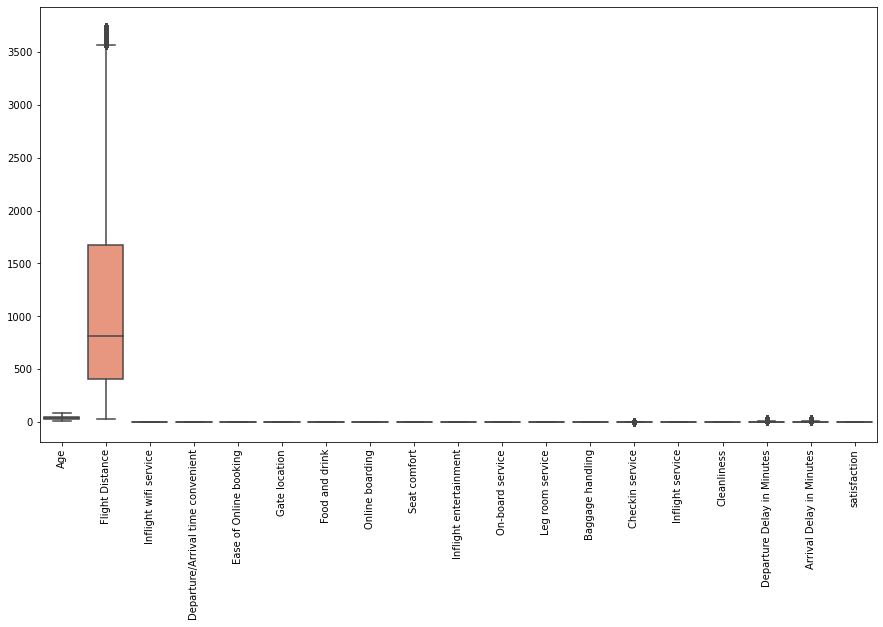

In [24]:
#Lets check if the outliers are removed
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df2)
plt.xticks(rotation=90)
plt.show()


In [25]:
# as the outliers are still present lets find out the data dimensions if the data is reduced 
df2.shape

(106749, 23)

In [26]:
df2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1.0,...,5.0,4,3,4.0,4,5,5.0,25.0,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3.0,...,1.0,1,5,3.0,1,4,1.0,1.0,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2.0,...,5.0,4,3,4.0,4,4,5.0,0.0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5.0,...,2.0,2,5,3.0,1,4,2.0,11.0,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3.0,...,3.0,3,4,4.0,3,3,3.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1.0,...,4.0,3,2,4.0,4,5,4.0,0.0,0.0,0
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4.0,...,4.0,4,5,5.0,5,5,4.0,0.0,0.0,1
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5.0,...,2.0,4,3,4.0,5,4,2.0,0.0,0.0,0
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3.0,...,4.0,3,2,5.0,4,5,4.0,0.0,0.0,1


In [27]:
# The number of rows in actual are 106749 ,however in the data the index range is till 129879 so we need to reset 
# the index
df2=df2.reset_index()


In [28]:
# Drop the existing index
df2.drop('index',axis=1,inplace=True)
df2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1.0,...,5.0,4,3,4.0,4,5,5.0,25.0,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3.0,...,1.0,1,5,3.0,1,4,1.0,1.0,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2.0,...,5.0,4,3,4.0,4,4,5.0,0.0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5.0,...,2.0,2,5,3.0,1,4,2.0,11.0,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3.0,...,3.0,3,4,4.0,3,3,3.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106744,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1.0,...,4.0,3,2,4.0,4,5,4.0,0.0,0.0,0
106745,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4.0,...,4.0,4,5,5.0,5,5,4.0,0.0,0.0,1
106746,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5.0,...,2.0,4,3,4.0,5,4,2.0,0.0,0.0,0
106747,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3.0,...,4.0,3,2,5.0,4,5,4.0,0.0,0.0,1


As the data rows are reduced we can say that some outliers were removed from the data but still some outliers are present in the data but we can't remove them further as that will result into data loss so we will proceed with 
this data 

<a id='MVT'></a>
### Missing Value Treatment - 

In [29]:
# Check for Null values
df2.isnull().sum()

Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                         582
Food and drink                          0
Online boarding                      2878
Seat comfort                          556
Inflight entertainment                694
On-board service                        0
Leg room service                        0
Baggage handling                      977
Checkin service                         0
Inflight service                        0
Cleanliness                           821
Departure Delay in Minutes           2217
Arrival Delay in Minutes              263
satisfaction                            0
dtype: int64

In [30]:
#Lets replace the string type null values with numpy null values so the null treatment can be done efficiently 
df2.replace({'NaN':np.nan},inplace=True)

In [31]:
#Lets treat the null values 
# Gate Location
df2['Gate location'].value_counts()
# We can see that we can clearly impute null values with the mode 3 as it more repeated in the data

3.0    28878
4.0    24955
2.0    20045
1.0    18097
5.0    14191
0.0        1
Name: Gate location, dtype: int64

In [32]:
# Null imputed
df2['Gate location']=df2['Gate location'].fillna(df2['Gate location'].mode()[0])

In [33]:
# Online boarding
df2['Online boarding'].value_counts()
# We can see that we can clearly impute null values with the mode 4 as it more repeated in the data

4.0    29293
3.0    22113
5.0    21333
2.0    17787
1.0    10642
0.0     2703
Name: Online boarding, dtype: int64

In [34]:
# Null imputed
df2['Online boarding']=df2['Online boarding'].fillna(df2['Online boarding'].mode()[0])

In [35]:
# Seat comfort
df2['Seat comfort'].value_counts()
# We can see that we can clearly impute null values with the mode 4 as it more repeated in the data

4.0    32397
5.0    27410
3.0    18938
2.0    15046
1.0    12402
Name: Seat comfort, dtype: int64

In [36]:
# Null imputed
df2['Seat comfort']=df2['Seat comfort'].fillna(df2['Seat comfort'].mode()[0])

In [37]:
# Inflight entertainment
df2['Inflight entertainment'].value_counts()

4.0    29828
5.0    26171
3.0    19199
2.0    18041
1.0    12802
0.0       14
Name: Inflight entertainment, dtype: int64

In [38]:
# Null imputed
df2['Inflight entertainment']=df2['Inflight entertainment'].fillna(df2['Inflight entertainment'].mode()[0])

In [39]:
# Baggage handling
df2['Baggage handling'].value_counts()

4.0    37557
5.0    28125
3.0    20854
2.0    11750
1.0     7486
Name: Baggage handling, dtype: int64

In [40]:
# Null imputed
df2['Baggage handling']=df2['Baggage handling'].fillna(df2['Baggage handling'].mode()[0])

In [41]:
# cleanliness 
df2['Cleanliness'].value_counts()

4.0    27312
3.0    25029
5.0    23523
2.0    16386
1.0    13668
0.0       10
Name: Cleanliness, dtype: int64

In [42]:
# Null imputed
df2['Cleanliness']=df2['Cleanliness'].fillna(df2['Cleanliness'].mode()[0])

In [43]:
# Null imputed
df2['Departure Delay in Minutes']=df2['Departure Delay in Minutes'].fillna(df2['Departure Delay in Minutes'].median())
# We imputed it through median as even after doing outlier treatment ,we still got some outliers in the data ,
# so we decided to impute it by median as mean is sensitive to outliers

In [44]:
# Null imputed
df2['Arrival Delay in Minutes']=df2['Arrival Delay in Minutes'].fillna(df2['Arrival Delay in Minutes'].median())
# We imputed it through median as even after doing outlier treatment ,we still got some outliers in the data ,
# so we decided to impute it by median as mean is sensitive to outliers

In [45]:
df2.isnull().sum()
# We can see that all the null values have became zero so all the null values have been imputed .

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [46]:
df2.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [47]:
for i in df2.iloc[:,6:20].columns:
    df2[i] = df2[i].astype(object)

<a id='UA'></a>
## Univariate Analysis

In [48]:
# Here we seperated stored the numerical columns into df_num for further analysis
df_num=df2[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]

In [49]:
# Here we seperated stored the categorical columns into df_cat for further analysis
df_cat=df2[['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction']]

In [50]:
#Lets check for the dimensions of df_num
df_num.shape

(106749, 4)

In [51]:
#Lets check for the dimensions of df_cat
df_cat.shape

(106749, 19)

# Check for distribution of numerical data 
a=4
b=1
c=1
for i in df_num:
    plt.figure(figsize=(13,19))
    plt.subplot(a,b,c)
    sns.distplot(df_num[i])
    c=c+1

### Key Observations
1 The Univarient analysis for age shows that majority of our age data lies between the age of 10 years to 70 years
  and also density shows that data is near normal for age .
  
2 The Univarient analysis for flight distance shows that data is positively skewed which further provides us with       insights that there must be presence of outliers at right side of the data which is making it positively skewed       which is also confirmed by the boxplot which is showing presence of outliers even after outlier treatment ,also the   majority of our data lies between the range of 0 to 2800 as per the plot.

3 The Univarient Analysis for Departure Delay in Minutes shows that majority of the flights are not delayed as the 
  data is centered around 0 which is also logical as the majority of the flights come on time but is highly positively   skewed due to presence of outliers which is further confirmed by our plot above as even after outlier treatment some   outliers are not removed which are making it positively skewed . Also the a flight delays be last around 32 mins as   per the plot.
  
4 The Univarient Analysis for Arrival Delay in Minutes shows that majority of the flights are not delayed on arrival     as the data is centered around 0 which is also logical as the majority of the flights come on time but is highly       positively skewed due to presence of outliers which is further confirmed by our plot above as even after outlier       treatment some outliers are not removed which are making it positively skewed . Also the a flight delays be last       around 35 mins as per the plot.
  


In [52]:
# Lets ckeck the skewness of the data by the skewness score
for i in df_num:
    print(i,'Skewness score is : ',df_num[i].skew())
# Our above obsevations are confirmed by these skewness scores 

Age Skewness score is :  0.0011916153721291262
Flight Distance Skewness score is :  1.0516064068787248
Departure Delay in Minutes Skewness score is :  2.173581153246405
Arrival Delay in Minutes Skewness score is :  2.127521927579496


# Check for counts of categorical data
a=10
b=2
c=1
plt.figure(figsize=(19,50))
for i in df_cat:
    plt.subplot(a,b,c)
    sns.countplot(df_cat[i])
    c=c+1
plt.tight_layout
plt.show()

### Key Observations

1 The countplot for Gender shows that males and females are almost equal in number however females are little more 
  than males.
  
2 The countplot for Customer Type shows that number of loyal customers are very high as compared to disloyal             customers.

3 The countplot for Type of Travel shows that Business travel is more preferred in airline as compared to personal       travel.

4 The countplot for Business class shows that people travel almost equal in busniess class and Eco class , however 
  Eco Plus class is very less preferred as to compared .

5 The countplot for Inflight wifi service shows that people tend to give ratings of 2 and 3 more so room for             improvement.

6 The countplot for ratings of Departure/Arrival time convenient shows that most given ratings are 4 and 5 so on this   parameter the airpline is doing good  .

7 The countplot for ratigs of Ease of Online bookings shows that most given ratings are 2 and 3 so this needs to be     improved .

8 The countplot for ratings of Gate location shows that people are rating it more on 3 and 4 so this also can be         imporved.

9  The countplot for ratings of Food and drink shows that people are rating it near uniformly from 2 to 5 so no          definite answer is coming from it .

10 The countplot for ratings of Online boarding shows that people are rating it 4 at most which is good.

11 The countplot for ratings of Seat comfort shows that most given ratings are 4 and 5 which is good .

12 The countplot for ratings of Inflight Entertainment shows that most given ratings are 4 and 5 which is good.

13 The countplot for ratings of Onboard Service shows that rating of 4 is given most and after that 5 and 3 equally      given .

14 The countplot for ratings of Leg room service shows that rating of 4 and 5 are given most after that 2 and 3 are 
   near uniformly given .
   
15 The countplot for ratings of baggage handling shows that rating of 4 and 5 are given most .

16 The countplot for ratings of Checkin service shows that rating of 3 and 4 are given most and can be improved          further .

17 The countplot for ratings of Inflight service shows that ratings of 4 and 5 are given the most .

18 The countplot for ratings of Cleanliness shows that 4 is given most and then 5 and 3 are given almost equal.

19 The countplot for ratings of satisfaction shows that people tend to be more dissatisfied or neutral as per the data 
   however diiference between dissatisfied or neutral and satisfied isnt very large .

a=7
b=3
c=1
plt.figure(figsize=(15,40))
for i in df_cat:
    
    plt.subplot(a,b,c)
    plt.pie(df_cat[i].value_counts(),autopct='%1.0f%%',labels=df_cat[i].unique())
    c=c+1
plt.tight_layout
plt.show()

<a id='BV'></a>
## Bivariate Analysis

### 1) Numerical v/s Numerical

In [53]:
df_num.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25.0,18.0
1,25,235,1.0,6.0
2,26,1142,0.0,0.0
3,25,562,11.0,9.0
4,61,214,0.0,0.0


#Lets visualize out numerical data with scatterplot
plt.figure(figsize=(20,20))
sns.pairplot(df_num)
plt.show()


### Key Observation

We can say that there is no clear pattern in the above scatter plots , lets carify it further with the help of
other plots.

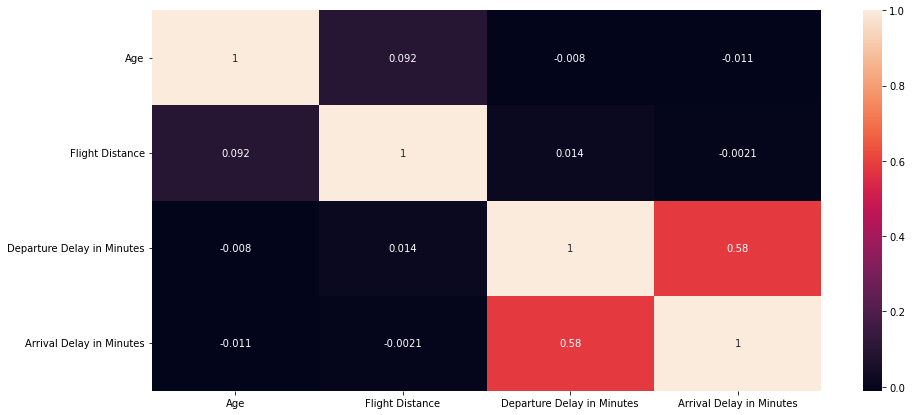

In [54]:
# Lets check the relationship between our numerical data with the help of heat map
plt.figure(figsize=(15,7))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

### Key Observations

From the above heatmap we can see that there is a positive correlation of 0.58 between Departure Delay in Minutes
and Arrival delay in minutes . There is no good correlation between the other numerical columns .

### 2) Numerical v/s Categorical

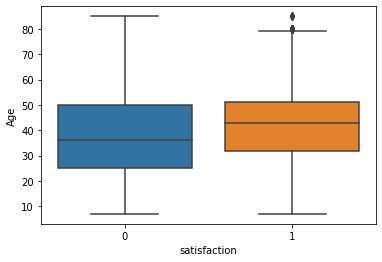

In [55]:
# Lets check if there is a pattern between age and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Age'])
plt.show()
# No as such pattern is found here

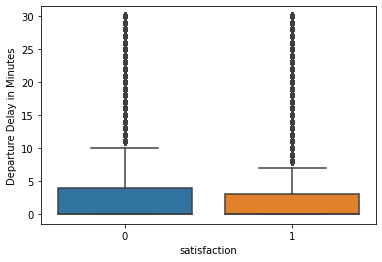

In [56]:
# Lets check if there is a pattern between departure delay in minutes and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Departure Delay in Minutes'])
plt.show()
# There is a minor patern that as the

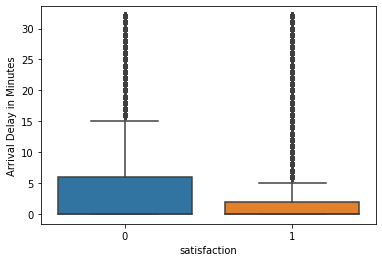

In [57]:
# Lets check if there is a pattern between arrival delay in minutes and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Arrival Delay in Minutes'])
plt.show()
# There is a pattern that as the arrival delay in minutes increases people tend more to be dissatisfied or neutral

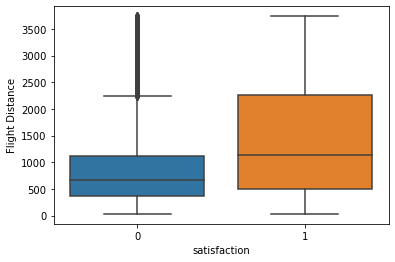

In [58]:
# Lets check if there is a pattern between flight distance and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Flight Distance'])
plt.show()
# People tend to be more satisfied as flight distance increases.

In [59]:
df2.groupby('satisfaction')['Age'].describe()
# No definite pattern

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,59629.0,37.628100,16.487312,7.0,25.0,36.0,50.0,85.0
1,47120.0,41.594588,12.990093,7.0,32.0,43.0,51.0,85.0


In [60]:
df2.groupby('satisfaction')['Departure Delay in Minutes'].describe()
# No definite pattern

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,59629.0,3.633199,6.940409,0.0,0.0,0.0,4.0,30.0
1,47120.0,3.070713,6.318026,0.0,0.0,0.0,3.0,30.0


In [61]:
df2.groupby('satisfaction')['Arrival Delay in Minutes'].describe()
# Our above inference from boxplot is confirmed by this as Arrival Delay in Minutes increases people tend to be
# dissatisfied or neutral

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,59629.0,4.030405,7.168124,0.0,0.0,0.0,6.0,32.0
1,47120.0,2.905178,6.221228,0.0,0.0,0.0,2.0,32.0


In [62]:
df2.groupby('satisfaction')['Flight Distance'].describe()
# From the below observation we can say that if the distance is greater than the passenger is more satisfied.

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,59629.0,898.146305,737.600373,31.0,369.0,666.0,1121.0,3738.0
1,47120.0,1427.439750,1043.607065,31.0,493.0,1129.0,2266.0,3739.0


## 3) Categorical v/s Categorical

In [63]:
tb1 = pd.crosstab(df_cat['Gender'],df_cat['satisfaction'])
tb1

satisfaction,0,1
Gender,,
Female,30592,23615
Male,29037,23505


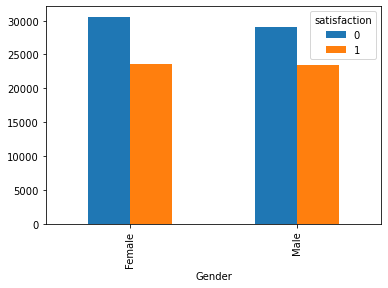

In [64]:
tb1.plot(kind='bar')
plt.show()

a=7
b=3
c=1
plt.figure(figsize=(15,10))
for i in df_cat:
    
    #plt.subplot(a,b,c)
    (pd.crosstab(df_cat[i],df_cat['satisfaction'])).plot(kind='bar')
    c=c+1
plt.tight_layout
plt.show()

### Key Observations

1 In both male and female category there are more counts of dissatisfaction or neutral than satisfied.

2 In both loyal customer and disloyal customer , the count of dissatisfied is more and and there is a near balance
  between loyal customer's satisfaction and dissatisfaction ratio and also the count is more than disloyal customers.

3 In Type of travel volume of busniess travel is more than personal travel and also in busniess travel people tend 
  to be more satisfied than dissatisfied but in personal travel the people are highly dissatisfied and very less are
  satisfied.

4 In class Business class people are highly satisfied but in eco class they are highly dissatisfied and in eco plus 
  they are slighly more dissatisfied.
  
5 In inflight wifi service we can see that people who have rated inflight wifi service 5 are very satisfied but there
  is strange pattern that people are have rated inflight wifi service 0 are also very satisfied , that could be         beacuse of other services satisfaction , but also people have majorly rated it 2 and 3 and are highly dissatisfied.

6 In Departure/Arrival time convenient people are more dissatisfied even after giving good ratings.

7 In Ease of Online booking people have majorly rated 2 and 3 and are highly dissatisfied at that range and at rating
  5 people are more satisfied .
  
8 In Gate location people have majorly rated 3 and 4 and are highly dissatisfied at that range .

9 In food and drinks ratings are more uniformly spread out from 1 to 5 and at rating 2 and 3 dissatisfied counts are
  more than satisfied and at 4 , 5 ratings the staisfied people are more .
  
10 In Online boarding people who have rated it till 3 are highly dissatisfied and people who have rated it 4 and 5
   are very staisfied so it is can inferred that Online boarding is a very important factor in deciding whether
   a customer will be satisfied or dissatisfied .

11 In Seat comfort people who have rated it till 3 are highly dissatisfied and people who have rated it 5
   are very staisfied so it is can inferred that Seat Comfort is a very important factor in deciding whether
   a customer will be satisfied or dissatisfied .

12 In Inflight entertainment people who have rated it till 3 are highly dissatisfied and people who have rated it 4 &    5 are very staisfied so it is can inferred that Inflight entertainment is a very important factor in deciding          whether a customer will be satisfied or dissatisfied .

13  In On board service people who have rated it till 3 are highly dissatisfied and people who have rated it 5 are         very staisfied so it is can inferred that On board service is a very important factor in deciding whether
    a customer will be satisfied or dissatisfied .

14  In Leg room service people who have rated it till 3 are highly dissatisfied and people who have rated it 4 & 5 are     very staisfied so it is can inferred that Leg room service is a very important factor in deciding whether a           customer will be satisfied or dissatisfied .

15  In Baggage handling service people who have rated it till 3 are highly dissatisfied and people who have rated it 4     are also more dissatisfied than satisfied but 5 are very staisfied .

16 In Checkin service people who have rated it till 2 are highly dissatisfied and count in 3 & 4 are almost same but      here also dissatisfied are more .On 5 rating count of satisfied is more .

17 In Inflight service people who have rated it till 3 are highly dissatisfied and people who have rated it 4 are also    more dissatisfied than satisfied but 5 are more staisfied .

18 In Cleanliness service people who have rated it till 3 are highly dissatisfied and people who have rated it 5 are      very staisfied so it is can inferred that Cleanliness service is a very important factor in deciding whether
   a customer will be satisfied or dissatisfied .
    
19 The number of dissatisfied or neutral are more than satisfied people and the class is minorly imbalanced.

### 4) Each category to Each category analysis - 

for i in df_cat:
    for j in df_cat:
        (pd.crosstab(df[i],df[j])).plot(kind="bar")
plt.show()

<a id='MA'></a>
# Multivariate Analysis - 

### 1) Type of Travel, Class, Flight Distance:

with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=df2, kind="bar", height=4.5, aspect=.8)

**Type of Travel, Class, Flight Distance**: For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.

### 2) Online Boarding, Departure/Arrival Time Convenience, Class:

with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival time convenient", y="Online boarding", hue="satisfaction", col="Class", data=df2, kind="bar", height=4.5, aspect=.8)

**Online Boarding, Departure/Arrival Time Convenience grouped by Class**: For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers.

### 3) Departure Delay or Arrival Delay , Type of Travel ,Class :

with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df2, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df2, kind="bar", height=4.5, aspect=.8)

**Departure Delay, Arrival Delay grouped by Type of Travel**: For personal travel (specially Eco Plus and Eco), the no. of dissatisfied passengers are really high when arrival delay in minutes is high. Now, this is quite obvious. By minute comparison, all combinations have higher no. of dissatisfied passengers compared to no. of satisfied passengers.

### 4) Baggage Handling, Gate Location, Class :

with sns.axes_style('white'):
    g = sns.catplot(x="Gate location", y="Baggage handling", hue="satisfaction", col="Class", 
                    data=df2, kind="box", height=4.5, aspect=.8)

**Baggage Handling, Gate Location grouped by Class**: For business class, it is observed that all gate locations have higher no. of dissatisfied passengers when baggage handling is not done perfectly well (rating <= 4). For Eco Plus, when the gate location is 1 and for Eco, when the gate location is 2, even when the baggages are handled in a mediocre way (rating in range 2.0 - 4.0), passengers remained dissatisfied.

### 5) Inflight Entertainment, Inflight wi-fi Service, Class:

with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=df2, kind="box", height=4.5, aspect=.8)

**Inflight Entertainment, Inflight wi-fi Service grouped by Class**: It is interesting to find that Eco Plus passengers are mostly satisfied without in-flight wi-fi service (rating 0) and medium level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can make them satisfied. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

### Ease of Online Booking, Seat Comfort, Cleanliness, Food and Drink - 

with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease of Online booking", col_wrap=6, data=df2, kind="count", height=2.5, aspect=.9)

with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat comfort", col_wrap=6, data=df2, kind="count", height=2.5, aspect=.9)

with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=df2, kind="count", height=2.5, aspect=.9)

with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food and drink", col_wrap=6, data=df2, kind="count", height=2.5, aspect=.9)

**Ease of Online Booking, Seat Comfort, Cleanliness, Food and Drink**: For all of these features, maximum no. of satisfied passengers belong to the category of 4 and 5 rating givers. Below rating 4, passengers are mostly dissatisfied.

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106749 entries, 0 to 106748
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             106749 non-null  object 
 1   Customer Type                      106749 non-null  object 
 2   Age                                106749 non-null  int64  
 3   Type of Travel                     106749 non-null  object 
 4   Class                              106749 non-null  object 
 5   Flight Distance                    106749 non-null  int64  
 6   Inflight wifi service              106749 non-null  object 
 7   Departure/Arrival time convenient  106749 non-null  object 
 8   Ease of Online booking             106749 non-null  object 
 9   Gate location                      106749 non-null  object 
 10  Food and drink                     106749 non-null  object 
 11  Online boarding                    1067

In [66]:
df2[['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Age']] = df2[['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Age']].astype(np.number)

<a id='DPM'></a>
## Data Preparation for Modeling - 

In [67]:
#lets store categorical data type 
cat=df2.select_dtypes(np.object)

In [68]:
# dummies done for the categorical data type 
x_cat=pd.get_dummies(cat,drop_first=True)

In [69]:
# numerical data type selected 
x_num=df2.select_dtypes(np.number)

In [70]:
# both dummies and numerical data type are concated into one dataframe
x1=pd.concat([x_num,x_cat],axis=1)

In [71]:
x2 = x1.drop("satisfaction",axis=1)

In [72]:
x = sm.add_constant(x2)

In [73]:
#our target variable
y=df2['satisfaction']

### Train Test Split -

In [74]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [75]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(74724, 24) (32025, 24) (74724,) (32025,)


In [76]:
model=sm.Logit(ytrain,xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.338340
         Iterations 7


In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                74724
Model:                          Logit   Df Residuals:                    74700
Method:                           MLE   Df Model:                           23
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.5067
Time:                        12:31:08   Log-Likelihood:                -25282.
converged:                       True   LL-Null:                       -51252.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -5.2820      0.088    -59.883      0.000      -5.455      -5.109
Age                                  -0.0105      0.001    -12.722      0.000      -0.012      -0.009
Flight Distance                   -2.661e-05   1.43e-05     -1.866      0.062   -5.46e-05    1.34e-06
Inflight wifi service                 0.4448      0.014     32.688      0.000       0.418       0.471
Departure/Arrival time convenient    -0.1309      0.009    -13.929      0.000      -0.149      -0.112
Ease of Online booking               -0.1933      0.013    -14.484      0.000      -0.219      -0.167
Gate location                         0.0259      0.011      2.452      0.014       0.005       0.047
Food and drink                       -0.0633      0.013     -4.891      0.000      -0.089      -0.038
Online boarding                       0.5932      0.012     49.667      0.000       0.570       0.617
Seat comfort                          0.0757      0.013      5.790      0.000       0.050       0.101
Inflight entertainment                0.0281      0.017      1.619      0.106      -0.006       0.062
On-board service                      0.3186      0.012     26.539      0.000       0.295       0.342
Leg room service                      0.2531      0.010     25.652      0.000       0.234       0.272
Baggage handling                      0.1136      0.013      8.561      0.000       0.088       0.140
Checkin service                       0.3178      0.010     31.937      0.000       0.298       0.337
Inflight service                      0.0996      0.014      7.039      0.000       0.072       0.127
Cleanliness                           0.2556      0.014     17.861      0.000       0.228       0.284
Departure Delay in Minutes            0.0006      0.002      0.264      0.792      -0.004       0.005
Arrival Delay in Minutes             -0.0392      0.002    -18.483      0.000      -0.043      -0.035
Gender_Male                           0.0479      0.023      2.101      0.036       0.003       0.093
Customer Type_disloyal Customer      -2.1085      0.035    -60.330      0.000      -2.177      -2.040
Type of Travel_Personal Travel       -2.6720      0.036    -74.202      0.000      -2.743      -2.601
Class_Eco                            -0.7524      0.030    -25.168      0.000      -0.811      -0.694
Class_Eco Plus                       -0.8373      0.048    -17.425      0.000      -0.932      -0.743
=====================================================================================================
"""

In [78]:
#Lets get the pvalues of the features
pvalue = pd.DataFrame(model.pvalues)

In [79]:
#Significant Festures which are having pvalue less than 0.05
pvalue[pvalue[0]>0.05].index

Index(['Flight Distance', 'Inflight entertainment',
       'Departure Delay in Minutes'],
      dtype='object')

In [80]:
#new_xtrain with significant features
xtrain.drop(['Flight Distance', 'Inflight entertainment',
       'Departure Delay in Minutes'],axis=1,inplace=True)

In [81]:
#new_xtest with significant features
xtest.drop(['Flight Distance', 'Inflight entertainment',
       'Departure Delay in Minutes'],axis=1,inplace=True)

## Model Fitting - 

## Logistic Model With significant variable - 

In [131]:
model1=sm.Logit(ytrain,xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.338381
         Iterations 7


In [132]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                74724
Model:                          Logit   Df Residuals:                    74703
Method:                           MLE   Df Model:                           20
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.5067
Time:                        12:50:23   Log-Likelihood:                -25285.
converged:                       True   LL-Null:                       -51252.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -5.3587      0.083    -64.884      0.000      -5.521      -5.197
Age                                  -0.0103      0.001    -12.558      0.000      -0.012      -0.009
Inflight wifi service                 0.4494      0.013     33.431      0.000       0.423       0.476
Departure/Arrival time convenient    -0.1323      0.009    -14.120      0.000      -0.151      -0.114
Ease of Online booking               -0.1946      0.013    -14.596      0.000      -0.221      -0.168
Gate location                         0.0266      0.011      2.518      0.012       0.006       0.047
Food and drink                       -0.0549      0.012     -4.604      0.000      -0.078      -0.032
Online boarding                       0.5906      0.012     49.741      0.000       0.567       0.614
Seat comfort                          0.0809      0.013      6.418      0.000       0.056       0.106
On-board service                      0.3236      0.012     28.035      0.000       0.301       0.346
Leg room service                      0.2542      0.010     25.945      0.000       0.235       0.273
Baggage handling                      0.1174      0.013      8.973      0.000       0.092       0.143
Checkin service                       0.3149      0.010     32.128      0.000       0.296       0.334
Inflight service                      0.1065      0.014      7.840      0.000       0.080       0.133
Cleanliness                           0.2651      0.013     20.359      0.000       0.240       0.291
Arrival Delay in Minutes             -0.0389      0.002    -22.469      0.000      -0.042      -0.036
Gender_Male                           0.0465      0.023      2.039      0.041       0.002       0.091
Customer Type_disloyal Customer      -2.1029      0.033    -63.449      0.000      -2.168      -2.038
Type of Travel_Personal Travel       -2.6741      0.035    -75.827      0.000      -2.743      -2.605
Class_Eco                            -0.7310      0.028    -25.765      0.000      -0.787      -0.675
Class_Eco Plus                       -0.8134      0.047    -17.400      0.000      -0.905      -0.722
=====================================================================================================
"""

In [133]:
Ypred = model1.predict(xtest)

In [134]:
ypred = [ 0 if x < 0.5 else 1 for x in Ypred]


In [95]:
accuracy_score = print("Accuracy Score", accuracy_score(ytest,ypred))

TypeError: 'NoneType' object is not callable

In [140]:
xpred = model1.predict(xtrain)
xpred = [ 0 if x < 0.5 else 1 for x in xpred]


In [141]:
print(classification_report(ytrain, xpred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     41858
           1       0.87      0.83      0.85     32866

    accuracy                           0.87     74724
   macro avg       0.87      0.87      0.87     74724
weighted avg       0.87      0.87      0.87     74724



In [137]:

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     17771
           1       0.87      0.83      0.85     14254

    accuracy                           0.87     32025
   macro avg       0.87      0.87      0.87     32025
weighted avg       0.87      0.87      0.87     32025



In [142]:
def plot_roc(model):
    y_pred_prob = model1.predict_proba(xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(model1)    

AttributeError: 'LogitResults' object has no attribute 'predict_proba'

<a id='ETC'></a>
## Extra Trees Classifier - 

In [98]:
#ExtraTreesClassifier model
et=ExtraTreesClassifier()

In [99]:
#fiited the model
model2=et.fit(xtrain,ytrain)

In [100]:
#model score for train dataset 
model2.score(xtrain,ytrain)

0.9999866174187677

In [101]:
#model score for test dataset
model2.score(xtest,ytest)

0.9584387197501951

In [103]:
pred2 = model2.predict(xtrain)
print(classification_report(xtest, pred2))

ValueError: Found input variables with inconsistent numbers of samples: [32025, 74724]

In [104]:
pred = model2.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     17771
           1       0.97      0.94      0.95     14254

    accuracy                           0.96     32025
   macro avg       0.96      0.96      0.96     32025
weighted avg       0.96      0.96      0.96     32025



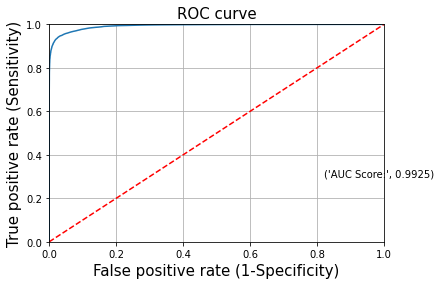

In [105]:
def plot_roc(model2):
    y_pred_prob = model2.predict_proba(xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(model2)    

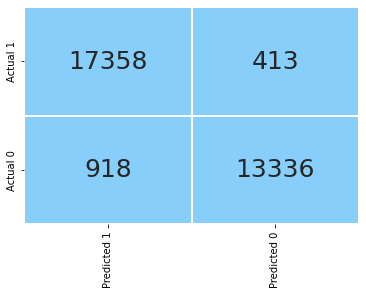

In [106]:
cm = confusion_matrix(ytest, pred)

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

<a id='GB'></a>
### Gradient Boosting Classifier With Hyper Paramater Tuning -

#parameters for hyperparameter tuning 
param=[{'max_depth':[7,8],'n_estimators':[100,200]}]

#GradientBoostingClassifier
gb=GradientBoostingClassifier()

#Tuning
grid=GridSearchCV(estimator=gb,param_grid=param,cv=10)

#fitting the model getting best parameters
moel=grid.fit(xtrain,ytrain)
moel.best_params_

In [107]:
gb=GradientBoostingClassifier(max_depth= 7, n_estimators= 200)
model3=gb.fit(xtrain,ytrain)

In [108]:
model3.score(xtrain,ytrain)

0.9803409881697982

In [109]:
model3.score(xtest,ytest)

0.9611865729898517

In [110]:
pred1 = model3.predict(xtrain)
print(classification_report(xtest, pred1))

ValueError: Found input variables with inconsistent numbers of samples: [32025, 74724]

In [111]:
pred = model3.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     17771
           1       0.97      0.94      0.96     14254

    accuracy                           0.96     32025
   macro avg       0.96      0.96      0.96     32025
weighted avg       0.96      0.96      0.96     32025



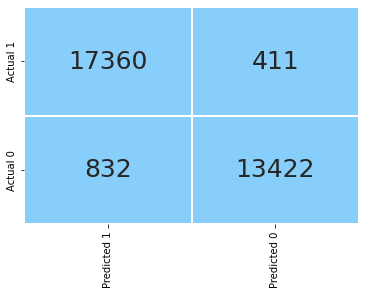

In [112]:
cm = confusion_matrix(ytest, pred)

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

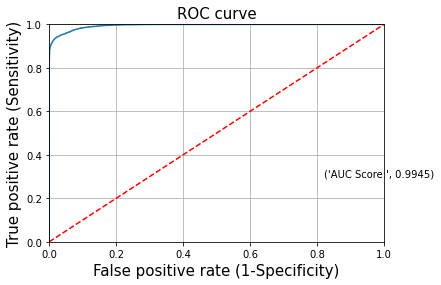

In [113]:
def plot_roc(model3):
    y_pred_prob = model3.predict_proba(xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(model3)    

<a id='DTC'></a>
### Decision Tree Classifier with Hyper Parameter Tuning - 

In [114]:
dt=DecisionTreeClassifier()

In [115]:
param=[{'max_depth':[7,8,9],'criterion':['gini','entropy']}]

In [ ]:
grid =GridSearchCV(estimator=dt,param_grid=param)

In [ ]:
model=grid.fit(xtrain,ytrain)

In [ ]:
model.best_params_

In [116]:
dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 9)

In [117]:
model4=dt.fit(xtrain,ytrain)

In [118]:
# The train accuracy 
model4.score(xtrain,ytrain)

0.9444221401423907

In [119]:
# The test accuracy
model4.score(xtest,ytest)

0.9413583138173303

In [120]:
ypred = model4.predict(xtrain)
print(classification_report(xtest, ypred))


ValueError: Found input variables with inconsistent numbers of samples: [32025, 74724]

In [121]:
ypred = model4.predict(xtest)
print(classification_report(ytest, ypred))


              precision    recall  f1-score   support

           0       0.93      0.96      0.95     17771
           1       0.95      0.91      0.93     14254

    accuracy                           0.94     32025
   macro avg       0.94      0.94      0.94     32025
weighted avg       0.94      0.94      0.94     32025



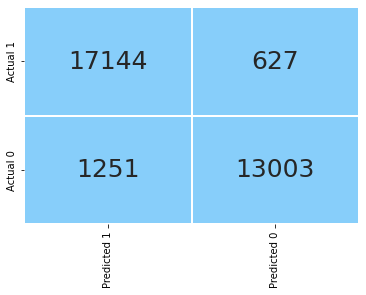

In [122]:
cm = confusion_matrix(ytest, ypred)

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

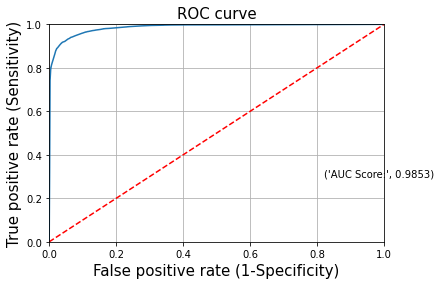

In [123]:
def plot_roc(model4):
    y_pred_prob = model4.predict_proba(xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(model4)    

#### As both the train and test score seems to be nearly same and also around 94% accuracy so it seems this is around 
#### perfect fit model

<a id='RFC'></a>
### Random Forest Tree Classifier with Hyper Parameter Tuning -

ran=RandomForestClassifier()

param=[{'max_depth':[8,9],'n_estimators':[100,200]}]

grid=GridSearchCV(estimator=ran,param_grid=param)

model=grid.fit(xtrain,ytrain)
model.best_params_

In [124]:
ran=RandomForestClassifier(max_depth= 9, n_estimators= 200)

In [125]:
model5=ran.fit(xtrain,ytrain)

In [126]:
model5.score(xtrain,ytrain)

0.9424816658637117

In [127]:
model5.score(xtest,ytest)

0.9424199843871975

In [128]:
pred = model5.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17771
           1       0.94      0.93      0.93     14254

    accuracy                           0.94     32025
   macro avg       0.94      0.94      0.94     32025
weighted avg       0.94      0.94      0.94     32025



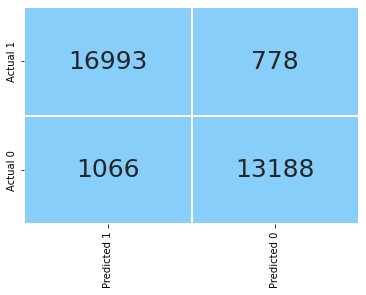

In [129]:
cm = confusion_matrix(ytest, pred)

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

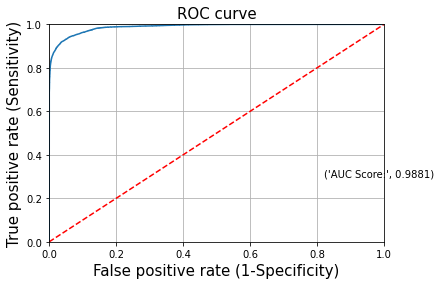

In [130]:
def plot_roc(model5):
    y_pred_prob = model5.predict_proba(xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    
plot_roc(model5)    

In [ ]:
# No such change in the accuracy of Decision Tree Classifier and Random Forest Classifier

## Conclusion

* As we can see with the complex model such as gradient boosting our model tends to overfit so we switched to the more simpler models and we are able to see that with the help of decsion tree we are able to achieve accuracy of 94% in training and both test datasets and as both accuracies of test and train are near same we can say that this is a good model . We are also able to achieve the same results with the help of random forest classifier the and its accuracy remains same that of decsion tree classifier so we go with the decision tree as our final model as decsion tree is giving us perfect accuracy in both train and test datasets and as random forest takes more time to run and is complex than decision tree so we will go with decsion tree as it will take less time to run and is not complex and also providing same accuracy as of random forest classifier.